In [465]:
import pandas as pd
import numpy as np
import flow
import pool
import os
import matplotlib.pyplot as plt
from IPython.display import clear_output
import seaborn as sns

In [10]:
def singleday(DaySorter, trace_type='dff'):
    """Build df for a single day loading/indexing efficiently.

    Parameters
    ----------
    mouse : str, mouse
    date : str, date
    trace_type : str, {'dff', 'zscore', 'deconvolved'}

    Returns
    -------
    pandas df
        df of all traces over all days for a cell
    """

    # assign folder structure for loading and load
    save_dir = os.path.join(flow.paths.outd, str(DaySorter.mouse),
                            'dfs ' + str(trace_type))
    path = os.path.join(save_dir, str(DaySorter.mouse) + '_'
                        + str(DaySorter.date) + '_df_' + trace_type
                        + '.pkl')
    dft = pd.read_pickle(path)

    # slice out your day of interest
    day_indexer = dft.index.get_level_values('date') == DaySorter.date
    dft = dft.loc[day_indexer, :]

    return dft

/Users/kelly_mcguire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in greater
/Users/kelly_mcguire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in less
/Users/kelly_mcguire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in greater
/Users/kelly_mcguire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in less
/Users/kelly_mcguire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in greater
/Users/kelly_mcguire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in less
/Users/kelly_mcguire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: Mean of empty slice
/Users/kelly_mcguire/anaconda3/lib/python3.6/site-packages/i

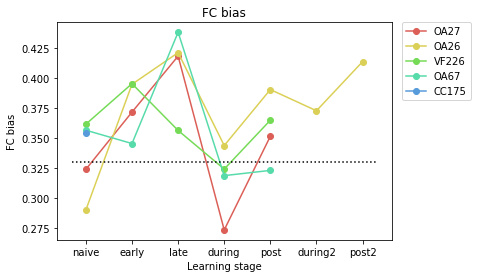

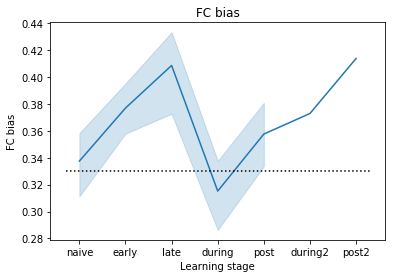

In [512]:
# drive thresh
mice = ['OA27', 'OA26', 'VF226', 'OA67', 'CC175']
naive = []
early = []
late = []
during = []
post = []
during2 = []
post2 = []
std_naive = []
std_early = []
std_late = []
std_during = []
std_post = []
std_during2 = []
std_post2 = []
app = []
dprime_thresh = 2
dprime_thresh2 = 2
for mouse in range(5):
    dprime = xmouse_dprime[mouse]
    lstate = xmouse_lstate[mouse]
    bias = xmouse_bias[mouse]
    xdp = []
    xls = []
    xbias =[]
    c = 0
    for dp, ls in zip(dprime, lstate):
#         xbias.append(np.nanmean(bias[c]))
        xbias.append(bias[c])
        xdp.append(dp)
        xls.append(ls)
        c = c + 1
    xbias = np.array(xbias)
    xbias[xbias > 4] = np.nan
    xdp = np.array(xdp)
#     xls = [str(s[0]) for s in xls if len(s) > 0 else np.nan]
    test = []
    for s in range(len(xls)):
        if  len(xls[s]) == 0:
            test.append(np.nan)
        else:
            test.append(xls[s][0])
    xls = test
#     xbias = np.array(xbias)
#     print([str(s) for s in xls])
    app.extend(xbias[np.isin(xls, 'naive').flatten()])
    naive.append(np.nanmean(xbias[np.isin(xls, 'naive').flatten()]))
    early.append(np.nanmean(xbias[(np.isin(xls, 'learning').flatten() | np.isin(xls, 'learning_start').flatten()) & (xdp < dprime_thresh)]))
    late.append(np.nanmean(xbias[np.isin(xls, 'learning').flatten() & (xdp > dprime_thresh2)]))
    during.append(np.nanmean(xbias[(np.isin(xls, 'reversal1_start').flatten() | np.isin(xls, 'reversal1').flatten()) & (xdp < dprime_thresh)]))
    post.append(np.nanmean(xbias[np.isin(xls, 'reversal1').flatten() & (xdp > dprime_thresh2)]))
    during2.append(np.nanmean(xbias[(np.isin(xls, 'reversal2_start').flatten() | np.isin(xls, 'reversal2').flatten()) & (xdp < dprime_thresh)]))
    post2.append(np.nanmean(xbias[np.isin(xls, 'reversal2').flatten() & (xdp > dprime_thresh2)]))

    std_naive.append(np.nanstd(xbias[np.isin(xls, 'naive').flatten()]))
    std_early.append(np.nanstd(xbias[(np.isin(xls, 'learning').flatten() | np.isin(xls, 'learning_start').flatten()) & (xdp < dprime_thresh)]))
    std_late.append(np.nanstd(xbias[np.isin(xls, 'learning').flatten() & (xdp > dprime_thresh2)]))
    std_during.append(np.nanstd(xbias[(np.isin(xls, 'reversal1_start').flatten() | np.isin(xls, 'reversal1').flatten()) & (xdp < dprime_thresh)]))
    std_post.append(np.nanstd(xbias[np.isin(xls, 'reversal1').flatten() & (xdp > dprime_thresh2)]))
    std_during2.append(np.nanstd(xbias[(np.isin(xls, 'reversal2_start').flatten() | np.isin(xls, 'reversal2').flatten()) & (xdp < dprime_thresh)]))
    std_post2.append(np.nanstd(xbias[np.isin(xls, 'reversal2').flatten() & (xdp > dprime_thresh2)]))
#     naive.append(xbias[np.isin(xls, 'naive').flatten()])
#     early.append(xbias[(np.isin(xls, 'learning').flatten() | np.isin(xls, 'learning_start').flatten()) & (xdp < 2)])
#     late.append(xbias[np.isin(xls, 'learning').flatten() & (xdp > 2)])
#     during.append(xbias[(np.isin(xls, 'reversal1_start').flatten() | np.isin(xls, 'reversal1').flatten()) & (xdp < 2)])
#     post.append(xbias[np.isin(xls, 'reversal1').flatten() & (xdp > 2)])
#     during2.append(xbias[(np.isin(xls, 'reversal2_start').flatten() | np.isin(xls, 'reversal2').flatten()) & (xdp < 2)])
#     post2.append(xbias[np.isin(xls, 'reversal2').flatten() & (xdp > 2)])

# errorbar(x, y, yerr=None, xerr=None
fig = plt.figure()
cmap = sns.color_palette("hls", 7)
# cmap = sns.color_palette("cubehelix", 7)
for c, mouse in enumerate(zip(naive, early, late, during, post, during2, post2)):
    yerr = np.array([std_naive[c], std_early[c], std_late[c], std_during[c], std_post[c], std_during2[c], std_post2[c]])
#     plt.errorbar((0,1,2,3,4,5,6), mouse, '-o', yerr=yerr, label=mice[c])
#     sns.lineplot(x=(0,1,2,3,4,5,6), y=mouse, label=mice[c])
    plt.plot(mouse, '-o', label=mice[c], color=cmap[c])
    plt.title('FC bias')
    plt.ylabel('FC bias')
    plt.xlabel('Learning stage')
    plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=0.)
#     c = c + 1
ax = fig.axes
x = plt.xlim()
ax[0].set_xticks(range(0,7))
ax[0].set_xticklabels(['naive', 'early', 'late', 'during', 'post', 'during2', 'post2'])
plt.plot(x, (0.33, 0.33), ':k')
figpath = os.path.join(flow.paths.graphd, 'FC bias')
if not os.path.isdir(figpath): os.mkdir(figpath)
figpath = os.path.join(figpath, 'FCbias.eps')
plt.savefig(figpath, bbox_inches='tight')

# plot with seaborn
org_data = [naive, early, late, during, post, during2, post2]
my_x = []
my_y = []
for c, i in enumerate(org_data):
    my_x.extend([c]*len(i))
    my_y.extend(list(i))
    
fig2 = plt.figure()
sns.lineplot(x=my_x, y=my_y, palette="muted")
# plt.plot(mouse, '-o', label=mice[c])
plt.title('FC bias')
plt.ylabel('FC bias')
plt.xlabel('Learning stage')
# plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=0.)

figpath = os.path.join(flow.paths.graphd, 'FC bias')
if not os.path.isdir(figpath): os.mkdir(figpath)
figpath = os.path.join(figpath, 'FCbias_mean_across_mice.pdf')
# plt.savefig(figpath, bbox_inches='tight')

ax1 = fig2.axes
x = plt.xlim()
ax1[0].set_xticks(range(0,7))
ax1[0].set_xticklabels(['naive', 'early', 'late', 'during', 'post', 'during2', 'post2'])
plt.plot(x, (0.33, 0.33), ':k')
plt.savefig(figpath, bbox_inches='tight')

In [508]:
import scipy.io

figpath = os.path.join(flow.paths.graphd, 'FC bias')
if not os.path.isdir(figpath): os.mkdir(figpath)
figpath = os.path.join(figpath, 'FCbias_learningstate_dprime.mat')
variables = {'bias': xmouse_bias, 'learning_state': xmouse_lstate, 'dprime': xmouse_dprime}
    
scipy.io.savemat(figpath, variables)

In [482]:
cmap[0]

(0.86, 0.3712, 0.33999999999999997)

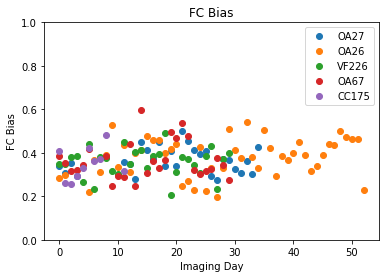

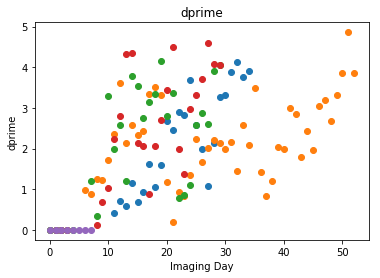

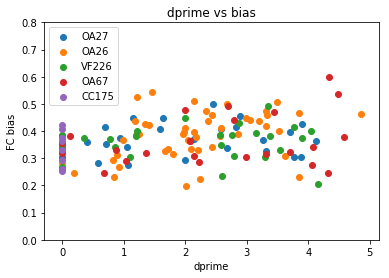

In [489]:
# bias over days
plt.figure()
for c, m in enumerate(xmouse_bias):
    xdb = []
    for d in m:
        xdb.append(d)
    plt.plot(xdb, 'o', label=mice[c])
    plt.title('FC Bias')
    plt.ylabel('FC Bias')
    plt.xlabel('Imaging Day')
    plt.legend()
    plt.ylim(0,1)
    
# dprime over days
plt.figure()
for m in xmouse_dprime:
    xdb = []
    for d in m:
        xdb.append(d)
    plt.plot(xdb, 'o')
    plt.title('dprime')
    plt.ylabel('dprime')
    plt.xlabel('Imaging Day')
    
# dprime over days
plt.figure()
for c, d in enumerate(xmouse_dprime):
    b = xmouse_bias[c]
    x = []
    y = []
    for dp in d:
        x.append(dp)
    for bp in b:
        y.append(bp)
        
    plt.scatter(x, y, label=mice[c])
    plt.title('dprime vs bias')
    plt.ylabel('FC bias')
    plt.xlabel('dprime')
    plt.ylim(0,.8)
    plt.legend()

In [232]:
dfm.loc[pd.IndexSlice[:, [170328]],:]

orientation        condition  trialerror  hunger  \
mouse date   run trial_idx                                                     
OA27  170328 2   0                  135        pavlovian           8  hungry   
                 1                  135        pavlovian           8  hungry   
                 2                   -1            blank           6  hungry   
                 3                  135        pavlovian           8  hungry   
                 4                  135        pavlovian           8  hungry   
                 5                  270          neutral           2  hungry   
                 6                  135             plus           0  hungry   
                 7                  135        pavlovian           8  hungry   
                 8                  270          neutral           2  hungry   
                 9                  135             plus           0  hungry   
                 10                 270          neutral           2  hungry   
                 11                   0            minus           4  hungry   
                 12                 135        pavlovian           8  hungry   
                 13                   0            minus           4  hungry   
                 14                 135             plus           0  hungry   
                 15                 135             plus           0  hungry   
                 16                   0            minus           4  hungry   
                 17                 270          neutral           3  hungry   
                 18                 135             plus           0  hungry   
                 19                 270          neutral           3  hungry   
                 20                 135             plus           0  hungry   
                 21                   0            minus           5  hungry   
                 22                 135             plus           0  hungry   
                 23                 270          neutral           2  hungry   
                 24                   0            minus           4  hungry   
                 25                 270          neutral           2  hungry   
                 26                   0            minus           5  hungry   
                 27                  -1            blank           6  hungry   
                 28                   0            minus           4  hungry   
                 29                   0            minus           4  hungry   
...                                 ...              ...         ...     ...   
             7   131                 90   orientation_90           1  hungry   
                 132                315  orientation_315           1  hungry   
                 133                135  orientation_135           1  hungry   
                 134                180  orientation_180           1  hungry   
                 135                 90   orientation_90           1  hungry   
                 136                180  orientation_180           1  hungry   
                 137                225  orientation_225           1  hungry   
                 138                135  orientation_135           1  hungry   
                 139                270  orientation_270           1  hungry   
                 140                  0    orientation_0           1  hungry   
                 141                 45   orientation_45           1  hungry   
                 142                315  orientation_315           1  hungry   
                 143                  0    orientation_0           1  hungry   
                 144                 90   orientation_90           1  hungry   
                 145                225  orientation_225           1  hungry   
                 146                225  orientation_225           1  hungry   
                 147                315  orientation_315           1  hungry   
                 148        

### mean across population 

#### don't use this version, the per cell metric is what Rohan used to do

In [ ]:
xmouse_bias = []
xmouse_norm_response = []
xmouse_dprime = []
xmouse_lstate = []
for mouse in ['OA27', 'OA26', 'VF226', 'OA67', 'CC175']:
    # mouse='OA27'
    trace_type='dff'
    driven=False
    drive_css=['plus', 'minus', 'neutral']
    stim_offset=1
    smooth=True

    """
    Get mean repsonse per cell.
    """

    # get all days for a mouse
    learning_state = []
    xday_bias = []
    xday_norm_response = []
    xday_dprime = []
    days = flow.DateSorter.frommeta(mice=[mouse])
    for c, day in enumerate(days):

        # get all cell ids
        d1_ids = flow.xday._read_crossday_ids(DaySorter.mouse, DaySorter.date)
        d1_ids = np.array([int(s) for s in d1_ids])

        # filter cells based on visual drive across all cs, prevent
        # breaking when only pavs are shown
    #     if driven:
    #         d1_drive = []
    #         for dcs in drive_css:
    #             try:
    #                 d1_drive.append(pool.calc.driven.visually(day, dcs))
    #             except KeyError:
    #                 print(str(DaySorter) + ' requested ' + dcs +
    #                       ': no match to what was shown (probably pav only).')
    #         d1_drive = np.max(d1_drive, axis=0) > 20
    #         cells = d1_ids[d1_drive]
    #     else:
    #         cells = d1_ids

        # get traces for the day
        dft = singleday(day, trace_type=trace_type)
        dft = dft.reset_index(level=['cell_idx', 'timestamp'])

        # filter out cells which are not driven 
        cell_indexer = dft['cell_idx'].isin(cells)
        dft = dft.loc[cell_indexer,:]

        # keep only times when stim is on the screen 
        time_indexer = dft['timestamp'].between(0, stim_offset, inclusive=False)
        dft = dft.loc[time_indexer,:]

        # get metadata for the day
        save_dir = os.path.join(flow.paths.outd, str(day.mouse))
        meta_path = os.path.join(save_dir, str(day.mouse) + '_df_trialmeta.pkl')
        dfm = pd.read_pickle(meta_path)

        # make sure that you match naive "plus" to learning "plus", etc.
        dfm = update_naive_conditions(dfm)

        # filter metadata trials before merging
        responses = []
        responses2 = []
        for dcs in drive_css:
            trial_indexer = (
                            ((dfm.orientation == 0) |
                             (dfm.orientation == 135) |
                             (dfm.orientation == 270))
                            &
                            ((dfm.learning_state == 'naive') |
                             (dfm.learning_state == 'learning_start') |
                             (dfm.learning_state == 'learning') |
                             (dfm.learning_state == 'reversal1') |
                             (dfm.learning_state == 'reversal1_start') |
                             (dfm.learning_state == 'reversal2') |
                             (dfm.learning_state == 'reversal2_start'))
                            &
                            ((dfm.condition == dcs))
                            &
                            ((dfm.tag == 'standard'))
                            &
                            (dfm.hunger == 'hungry'))
            dfcs = dfm.loc[trial_indexer, :]

            # merge on filtered trials
            dff = pd.merge(dft, dfcs, on=['mouse', 'date', 'run', 'trial_idx'], how='inner')
    #         print(c)
    #         # check that df is not empty, skip dfs that filtering empties
            if dff.empty:
                print('Day: ' + str(day.date) + ': skipped: empty dataframe after merge.')
                responses.append(np.nan)
                break

    #         # smooth signal with rolling 3 unit window
    #         if smooth:
    #             dff['trace'] = dff['trace'].rolling(3).mean()

            trial_mean = dff.pivot_table(index=['cell_idx', 'trial_idx'],
                                         columns='timestamp', 
                                         values='trace').mean(axis=1).to_frame()
            cell_mean = trial_mean.pivot_table(index=['cell_idx'],
                                          columns=['trial_idx']).mean(axis=1).tolist()
            ntrials = len(trial_mean)
            np.nanmean(cell_mean)
            responses.append(np.nanmean(cell_mean)) #[s for s in cell_mean if s > 0]

            test2 = [s for s in cell_mean if s < 0]
            print(ntrials, len(test2))
            responses2.append(np.nanmean(test2))
        if len(responses) != 3:
            continue

        try: # CHECK ON THIS KEY ERROR! all days that make it here have the three stimuli!
            xday_dprime.append(pool.calc.behavior.dprime(day, hmm_engaged=False))
        except KeyError:
            xday_dprime.append(np.nan)
    #         max_response = np.array([np.nanmax(s) for s in zip(*responses)])
    #         max_bool = max_response > 0
    #         min_response = np.array([np.nanmin(s) for s in zip(*responses)])
    #         norm_response = [(np.array(s)-min_response)/max_response for s in responses]
        max_response = np.nanmax(responses)
        min_response = np.nanmin(responses)
    #     norm_response = [(np.array(s)-min_response)/max_response for s in responses]

    #     bias = np.array(norm_response[0])/np.nansum(norm_response)
        bias = np.array(responses[0])/np.nansum(responses)
        bias2 = np.array(responses2[0])/np.nansum(responses2)
        print(bias, bias2)
        xday_bias.append(bias)
        learning_state.append(np.unique(dff['learning_state']))

    xmouse_lstate.append(learning_state)
    xmouse_bias.append(xday_bias)
    xmouse_norm_response.append(xday_norm_response)
    xmouse_dprime.append(xday_dprime)
    clear_output()

In [ ]:
dfm.loc[((dfm.learning_state == 'learning') | (dfm.learning_state == 'naive')
         & (dfm.tag == 'standard')), ['condition', 'orientation']]
dfm.loc[pd.IndexSlice[:, 170116], :]
trial_mean

In [ ]:
# bias over days
plt.figure()
for m in xmouse_bias:
    xdb = []
    for d in m:
        xdb.append(np.nanmean(d))
    plt.plot(xdb)
    plt.title('Plus Bias')
    plt.ylim((0, 1))

In [314]:
# plt.figure()
# plt.plot(dfm.loc[pd.IndexSlice[:, [range(170116,170127)]], dfm['orientation']].values)
# plt.ylim((0,1))

def update_naive_conditions(dfm):
    """ 
    Function to ensure that standard training naive runs match the conditions
    of the learning learning_state. This ensure that slicing on condition
    rather than orientation will still make sense. Treat naive "pavlovian"
    as "plus".
    
    Parameters:
    -----------
    dfm : pandas dataframe
        Dataframe of cross-day trial metadata for a mouse.
        
    Returns:
    --------
    dfm : pandas dataframe
        Updated dataframe with matched naive/learning standard training condtioms.
    """
    plus = np.unique(dfm.loc[((dfm.condition == 'plus') & (dfm.learning_state == 'learning')), ['orientation']].values)
    neutral = np.unique(dfm.loc[((dfm.condition == 'neutral') & (dfm.learning_state == 'learning')), ['orientation']].values)
    minus = np.unique(dfm.loc[((dfm.condition == 'minus') & (dfm.learning_state == 'learning')), ['orientation']].values)
    pav = np.unique(dfm.loc[((dfm.condition == 'pavlovian') & (dfm.learning_state == 'learning')), ['orientation']].values)
    oris = np.array([plus, minus, neutral, pav])
    oris = [int(s) for s in oris]
    conds = list(['plus', 'minus', 'neutral', 'plus']) # last entry, pavlovian treated as plus
    for c, ori in enumerate(oris):
        dfm.loc[((dfm.orientation == ori) &
                 (dfm.learning_state == 'naive') &
                 (dfm.tag == 'standard')), 'condition'] = conds[c]
        
    return dfm

### build a dataframe of your bias across days for each mouse

In [297]:
       index = pd.MultiIndex.from_arrays([
                [run.mouse] * vec_sz,
                [run.date] * vec_sz,
                [run.run] * vec_sz,
                trial_mat.reshape(vec_sz),
                cell_mat.reshape(vec_sz),
                time_mat.reshape(vec_sz)
                ],
                names=['mouse', 'date', 'run', 'trial_idx',
                       'cell_idx', 'timestamp'])

            # append all runs across a day together in a list
            trial_list.append(pd.DataFrame({'trace': run_traces.reshape(vec_sz)}, index=index))

            # clear your t2p to save memory
            run._t2p = None

        # concatenate and save df for the day
        trial_df = pd.concat(trial_list, axis=0)

orientation        condition  trialerror  hunger  \
mouse date   run trial_idx                                                     
OA27  170116 2   0                  315  orientation_315           1  hungry   
                 1                   90   orientation_90           1  hungry   
                 2                  270        pavlovian           1  hungry   
                 3                   90   orientation_90           1  hungry   
                 4                  225  orientation_225           1  hungry   

                           learning_state                  tag  firstlick  \
mouse date   run trial_idx                                                  
OA27  170116 2   0                  naive  orientation_mapping        NaN   
                 1                  naive  orientation_mapping        NaN   
                 2                  naive  orientation_mapping        NaN   
                 3                  naive  orientation_mapping        NaN   
                 4                  naive  orientation_mapping        NaN   

                            ensure  quinine  speed  
mouse date   run trial_idx                          
OA27  170116 2   0             NaN      NaN    NaN  
                 1             NaN      NaN    NaN  
                 2             NaN      NaN    NaN  
                 3             NaN      NaN    NaN  
                 4             NaN      NaN    NaN

### mean per cell for driven cells 

In [503]:
xmouse_bias = []
# xmouse_norm_response = []
xmouse_dprime = []
xmouse_lstate = []
for mouse in ['OA27', 'OA26', 'VF226', 'OA67', 'CC175']:
# mouse='OA27'
    trace_type='dff'
    driven=True
    drive_css=['plus', 'minus', 'neutral']
    stim_offset=1
    smooth=False
    drive_thresh = 5
    """
    Get mean repsonse per cell.
    """

    # get all days for a mouse
    learning_state = []
    xday_bias = []
    xday_norm_response = []
    xday_dprime = []
    days = flow.DateSorter.frommeta(mice=[mouse])
    for DaySorter in days:

        # get all cell ids
        d1_ids = flow.xday._read_crossday_ids(DaySorter.mouse, DaySorter.date)
        d1_ids = np.array([int(s) for s in d1_ids])

        # filter cells based on visual drive across all cs, prevent
        # breaking when only pavs are shown
        if driven:
            d1_drive = []
            for dcs in drive_css:
                try:
                    d1_drive.append(pool.calc.driven.visually(DaySorter, dcs))
                except KeyError:
                    print(str(DaySorter) + ' requested ' + dcs +
                          ': no match to what was shown (probably pav only).')
            d1_drive = np.max(d1_drive, axis=0) > drive_thresh
            cells = d1_ids[d1_drive]
        else:
            cells = d1_ids

        # get traces for the day
        dft = singleday(DaySorter, trace_type=trace_type)
        dft = dft.reset_index(level=['cell_idx', 'timestamp'])

        # filter out cells which are not driven 
        cell_indexer = dft['cell_idx'].isin(cells)
        dft = dft.loc[cell_indexer,:]

        # keep only times when stim is on the screen 
        time_indexer = dft['timestamp'].between(0, stim_offset, inclusive=False)
        dft = dft.loc[time_indexer,:]

        # get metadata for the day
        save_dir = os.path.join(flow.paths.outd, str(DaySorter.mouse))
        meta_path = os.path.join(save_dir, str(DaySorter.mouse) + '_df_trialmeta.pkl')
        dfm = pd.read_pickle(meta_path)
        
        # ensure that 
        dfm = update_naive_conditions(dfm)

        # filter metadata trials before merging
        responses = []
        for dcs in drive_css:
            trial_indexer = (
                            ((dfm.orientation == 0) |
                             (dfm.orientation == 135) |
                             (dfm.orientation == 270))
                            &
                            ((dfm.learning_state == 'naive') |
                             (dfm.learning_state == 'learning_start') |
                             (dfm.learning_state == 'learning') |
                             (dfm.learning_state == 'reversal1') |
                             (dfm.learning_state == 'reversal1_start') |
                             (dfm.learning_state == 'reversal2') |
                             (dfm.learning_state == 'reversal2_start'))
                            &
                            ((dfm.condition == dcs))
                            &
                            ((dfm.tag == 'standard'))
                            &
                            (dfm.hunger == 'hungry'))
            dfcs = dfm.loc[trial_indexer, :]

            # merge on filtered trials
            dff = pd.merge(dft, dfcs, on=['mouse', 'date', 'run', 'trial_idx'], how='inner')

            # check that df is not empty, skip dfs that filtering empties
            if dff.empty:
                responses = [[np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan]]
                print('Day: ' + str(DaySorter.date) + ': skipped: empty dataframe after merge.')
                break

            # smooth signal with rolling 3 unit window
            if smooth:
                dff['trace'] = dff['trace'].rolling(3).mean()

            trial_mean = dff.pivot_table(index=['cell_idx', 'trial_idx'],
                                         columns='timestamp', 
                                         values='trace').mean(axis=1).to_frame()
            cell_mean = trial_mean.pivot_table(index=['cell_idx'],
                                          columns=['trial_idx']).mean(axis=1).tolist()
            cell_mean = np.array(cell_mean)
            cell_mean[cell_mean < 0] = 0
            responses.append(cell_mean)

#         if len(responses) != 3:
#             continue
        
        try: # CHECK ON THIS KEY ERROR! all days that make it here have the three stimuli!
            xday_dprime.append(pool.calc.behavior.dprime(DaySorter, hmm_engaged=False))
        except KeyError:
            xday_dprime.append(np.nan)
        
        
        max_response = np.array([np.nanmax(s) for s in zip(*responses)])
#         max_bool = max_response > 0
        min_response = 0  # np.array([np.nanmin(s) for s in zip(*responses)])
        norm_response = [(np.array(s)-min_response)/max_response for s in responses]

        bias = np.array(norm_response[0])/np.array([np.nansum(cell) for cell in zip(*norm_response)])
        print(np.nanmean(bias))
        xday_bias.append(np.nanmean(bias))
#         xday_norm_response.append([s[max_bool] for s in norm_response])
        learning_state.append(np.unique(dff['learning_state']))
    
    xmouse_lstate.append(learning_state)
    xmouse_bias.append(xday_bias)
    xmouse_norm_response.append(xday_norm_response)
    xmouse_dprime.append(xday_dprime)
    clear_output()

In [408]:
responses

[nan, nan, nan]

## Bias for cells driven naive and that were not driven naive

In [ ]:
xmouse_bias = []
# xmouse_norm_response = []
xmouse_dprime = []
xmouse_lstate = []
for mouse in ['OA27', 'OA26', 'VF226', 'OA67', 'CC175']:
# mouse='OA27'
    trace_type='dff'
    driven=True
    drive_css=['plus', 'minus', 'neutral']
    stim_offset=1
    smooth=False
    drive_thresh = 5
    """
    Get mean repsonse per cell.
    """

    # get all days for a mouse
    learning_state = []
    xday_bias = []
    xday_norm_response = []
    xday_dprime = []
    days = flow.DateSorter.frommeta(mice=[mouse])
    for DaySorter in days:

        # get all cell ids
        d1_ids = flow.xday._read_crossday_ids(DaySorter.mouse, DaySorter.date)
        d1_ids = np.array([int(s) for s in d1_ids])

        # filter cells based on visual drive across all cs, prevent
        # breaking when only pavs are shown
        if driven:
            d1_drive = []
            for dcs in drive_css:
                try:
                    d1_drive.append(pool.calc.driven.visually(DaySorter, dcs))
                except KeyError:
                    print(str(DaySorter) + ' requested ' + dcs +
                          ': no match to what was shown (probably pav only).')
            d1_drive = np.max(d1_drive, axis=0) > drive_thresh
            cells = d1_ids[d1_drive]
            cells_not_driven = d1_ids[d1_drive == false]
        else:
            cells = d1_ids

        # get traces for the day
        dft = singleday(DaySorter, trace_type=trace_type)
        dft = dft.reset_index(level=['cell_idx', 'timestamp'])

        # filter out cells which are not driven 
        cell_indexer = dft['cell_idx'].isin(cells)
        dft = dft.loc[cell_indexer,:]

        # keep only times when stim is on the screen 
        time_indexer = dft['timestamp'].between(0, stim_offset, inclusive=False)
        dft = dft.loc[time_indexer,:]

        # get metadata for the day
        save_dir = os.path.join(flow.paths.outd, str(DaySorter.mouse))
        meta_path = os.path.join(save_dir, str(DaySorter.mouse) + '_df_trialmeta.pkl')
        dfm = pd.read_pickle(meta_path)
        
        # ensure that 
        dfm = update_naive_conditions(dfm)

        # filter metadata trials before merging
        responses = []
        for dcs in drive_css:
            trial_indexer = (
                            ((dfm.orientation == 0) |
                             (dfm.orientation == 135) |
                             (dfm.orientation == 270))
                            &
                            ((dfm.learning_state == 'naive') |
                             (dfm.learning_state == 'learning_start') |
                             (dfm.learning_state == 'learning') |
                             (dfm.learning_state == 'reversal1') |
                             (dfm.learning_state == 'reversal1_start') |
                             (dfm.learning_state == 'reversal2') |
                             (dfm.learning_state == 'reversal2_start'))
                            &
                            ((dfm.condition == dcs))
                            &
                            ((dfm.tag == 'standard'))
                            &
                            (dfm.hunger == 'hungry'))
            dfcs = dfm.loc[trial_indexer, :]

            # merge on filtered trials
            dff = pd.merge(dft, dfcs, on=['mouse', 'date', 'run', 'trial_idx'], how='inner')

            # check that df is not empty, skip dfs that filtering empties
            if dff.empty:
                responses = [[np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan]]
                print('Day: ' + str(DaySorter.date) + ': skipped: empty dataframe after merge.')
                break

            # smooth signal with rolling 3 unit window
            if smooth:
                dff['trace'] = dff['trace'].rolling(3).mean()

            trial_mean = dff.pivot_table(index=['cell_idx', 'trial_idx'],
                                         columns='timestamp', 
                                         values='trace').mean(axis=1).to_frame()
            cell_mean = trial_mean.pivot_table(index=['cell_idx'],
                                          columns=['trial_idx']).mean(axis=1).tolist()
            cell_mean = np.array(cell_mean)
            cell_mean[cell_mean < 0] = 0
            responses.append(cell_mean)

#         if len(responses) != 3:
#             continue
        
        try: # CHECK ON THIS KEY ERROR! all days that make it here have the three stimuli!
            xday_dprime.append(pool.calc.behavior.dprime(DaySorter, hmm_engaged=True))
        except KeyError:
            xday_dprime.append(np.nan)
        
        
        max_response = np.array([np.nanmax(s) for s in zip(*responses)])
#         max_bool = max_response > 0
        min_response = 0  # np.array([np.nanmin(s) for s in zip(*responses)])
        norm_response = [(np.array(s)-min_response)/max_response for s in responses]

        bias = np.array(norm_response[0])/np.array([np.nansum(cell) for cell in zip(*norm_response)])
        print(np.nanmean(bias))
        xday_bias.append(np.nanmean(bias))
#         xday_norm_response.append([s[max_bool] for s in norm_response])
        learning_state.append(np.unique(dff['learning_state']))
    
    xmouse_lstate.append(learning_state)
    xmouse_bias.append(xday_bias)
    xmouse_norm_response.append(xday_norm_response)
    xmouse_dprime.append(xday_dprime)
    clear_output()

In [502]:
d1_drive

array([ True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
pool.calc.behavior.dprime(DaySorter)